## Initialization of Code

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn import set_config
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

random.seed = 73

wine = pd.read_csv('winequality-white.csv', delimiter=';')

# output pandas DataFrames rather than numpy arrays
set_config(transform_output="pandas")

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [2]:
# In this instance, the "1" value means good quality, and the "0" value means bad quality
wine['good_or_bad_quality'] = np.where(wine['quality'] > 5, 1, 0)

wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_or_bad_quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [3]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_or_bad_quality'],
      dtype='object')

In [4]:
wine.dtypes

,0
fixed acidity,float64
volatile acidity,float64
citric acid,float64
residual sugar,float64
chlorides,float64
free sulfur dioxide,float64
total sulfur dioxide,float64
density,float64
pH,float64
sulphates,float64


In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
 12  good_or_bad_quality   4898 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 497.6 KB


In [6]:
print(wine.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
good_or_bad_quality     0
dtype: int64


In [7]:
print(wine['good_or_bad_quality'].describe())


count    4898.000000
mean        0.665169
std         0.471979
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: good_or_bad_quality, dtype: float64


## EDA

In [8]:
# wine['good_or_bad_quality'] = wine['good_or_bad_quality'].astype(str)  # Convert to string or categorical


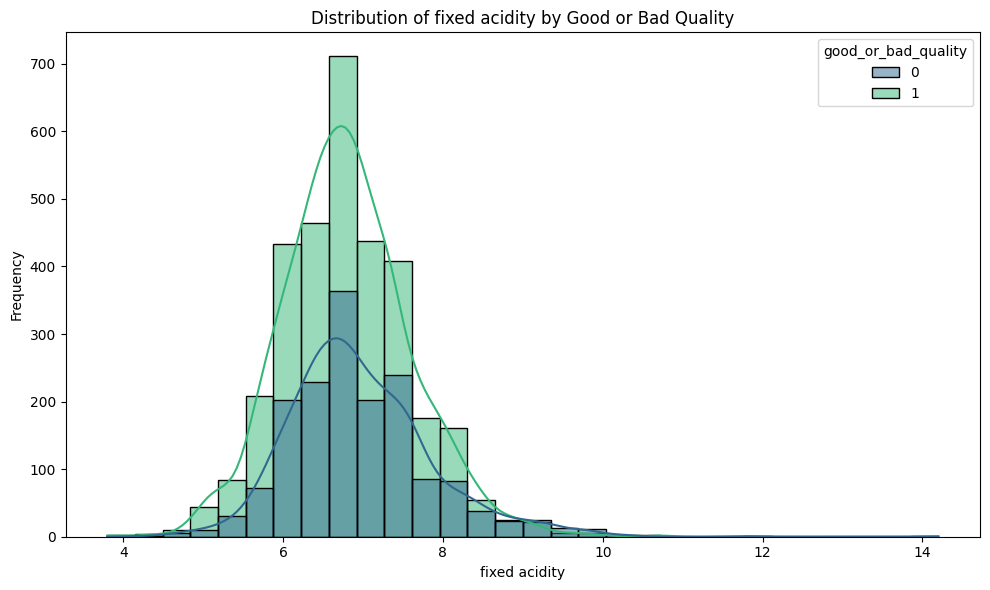

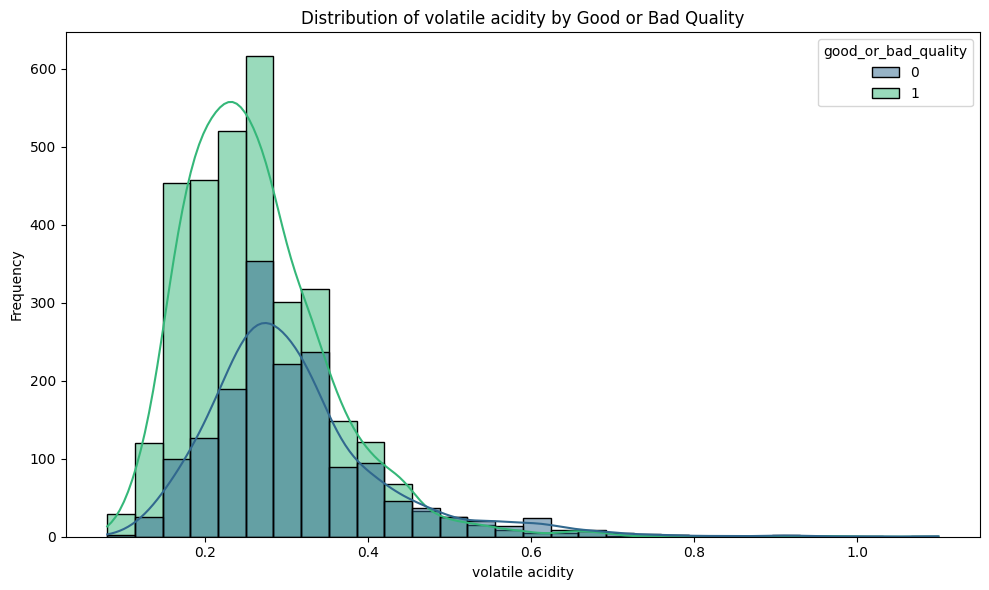

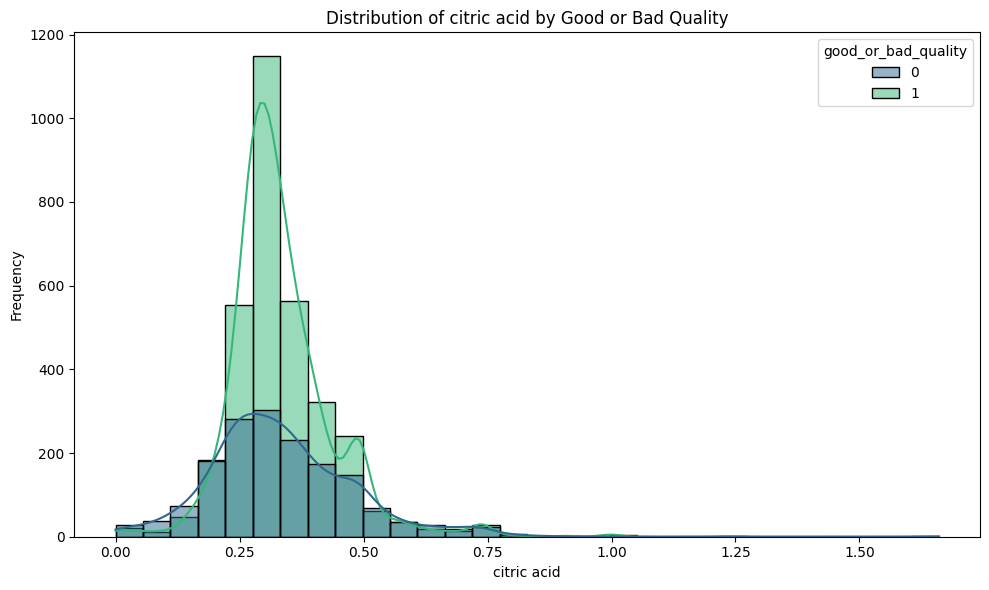

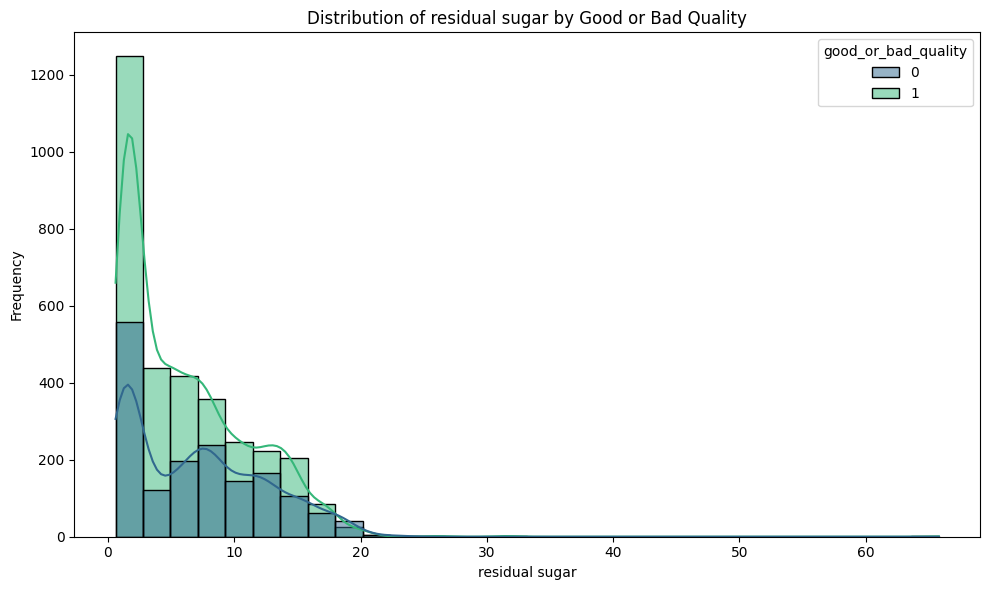

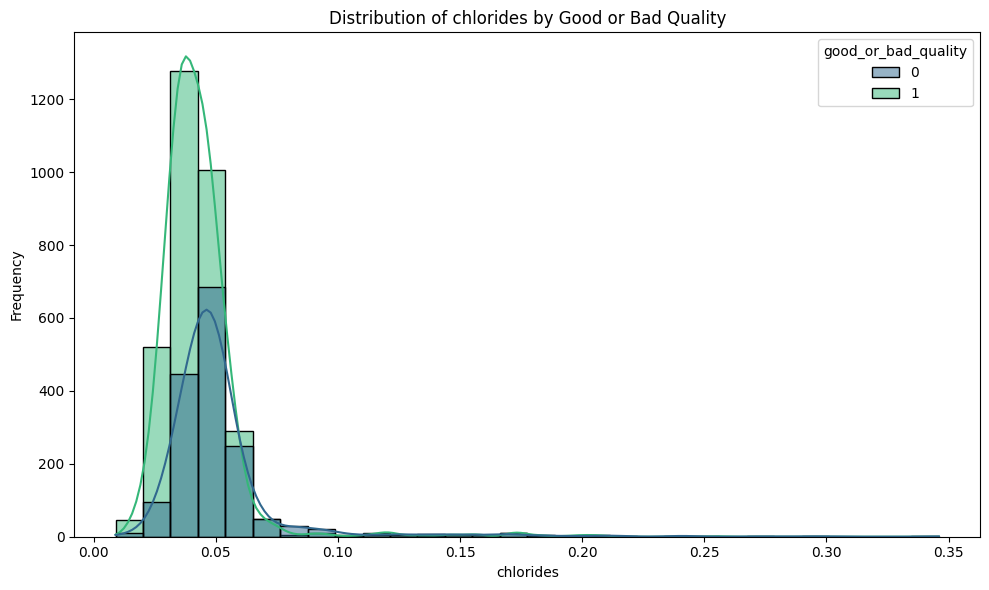

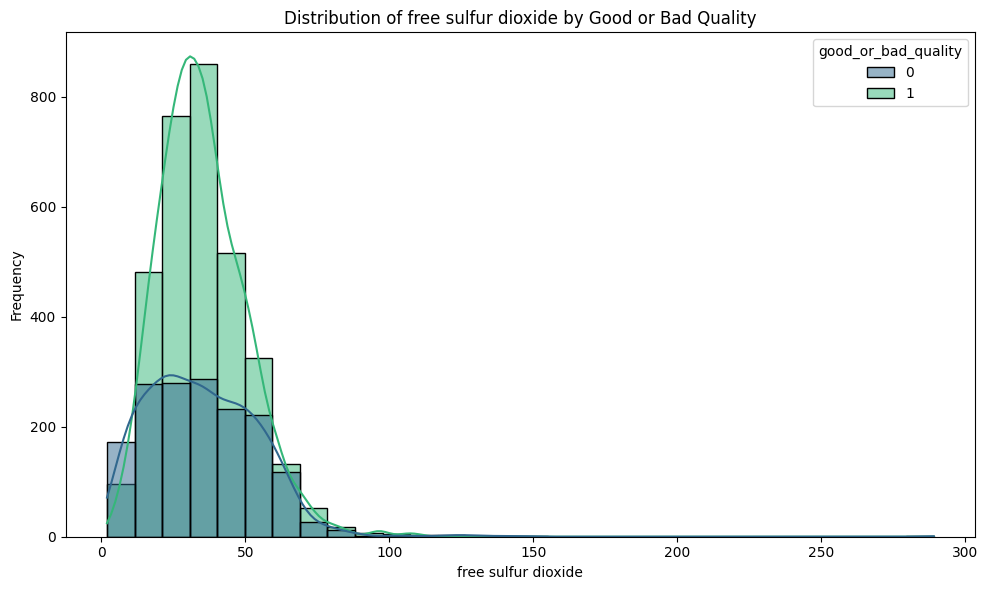

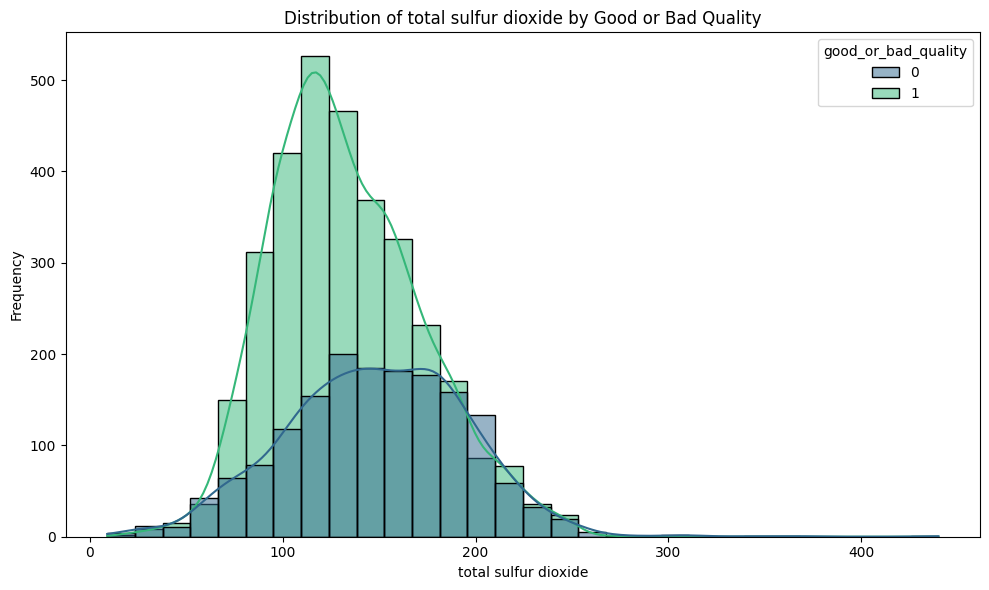

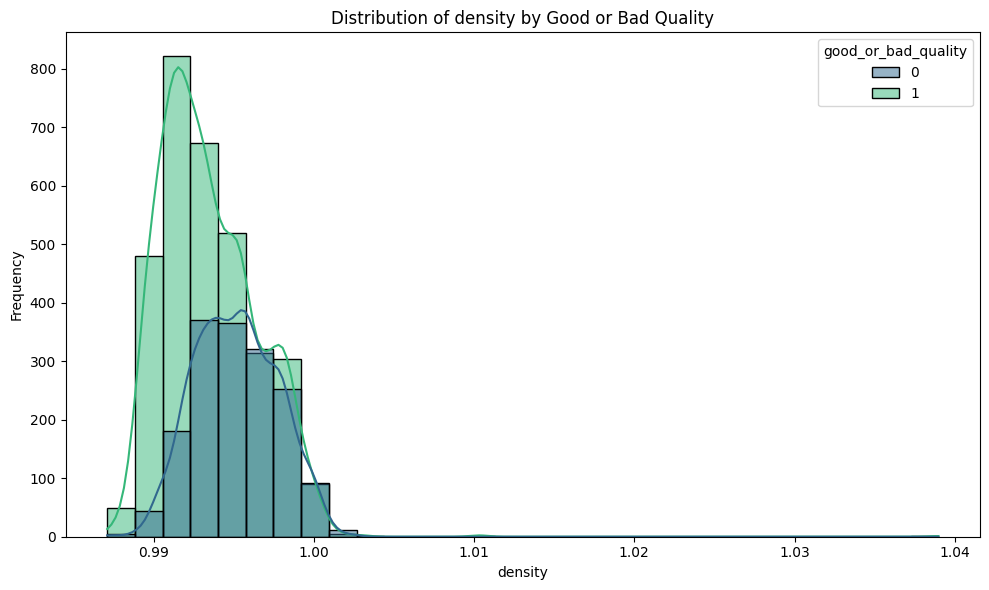

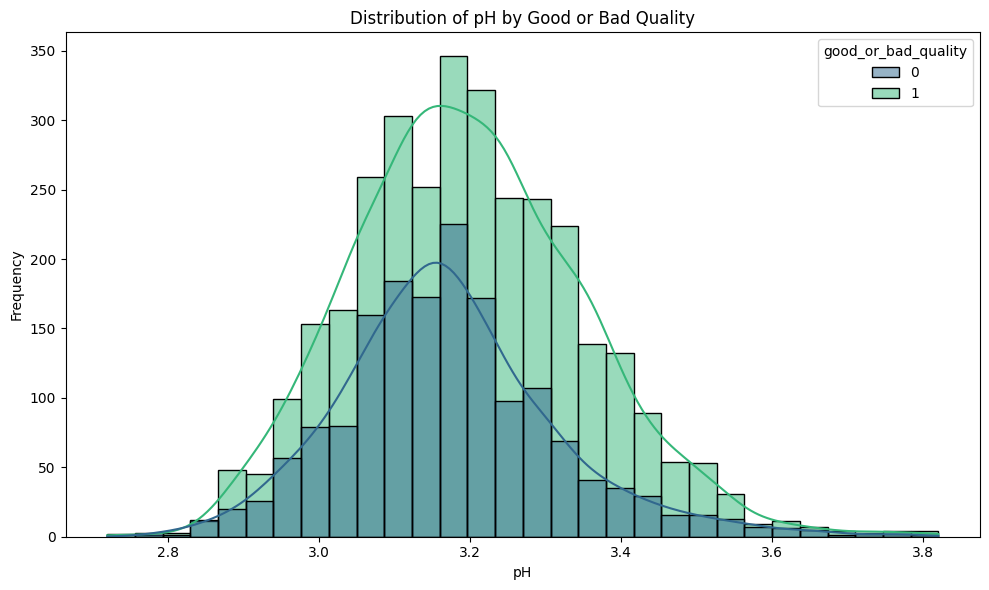

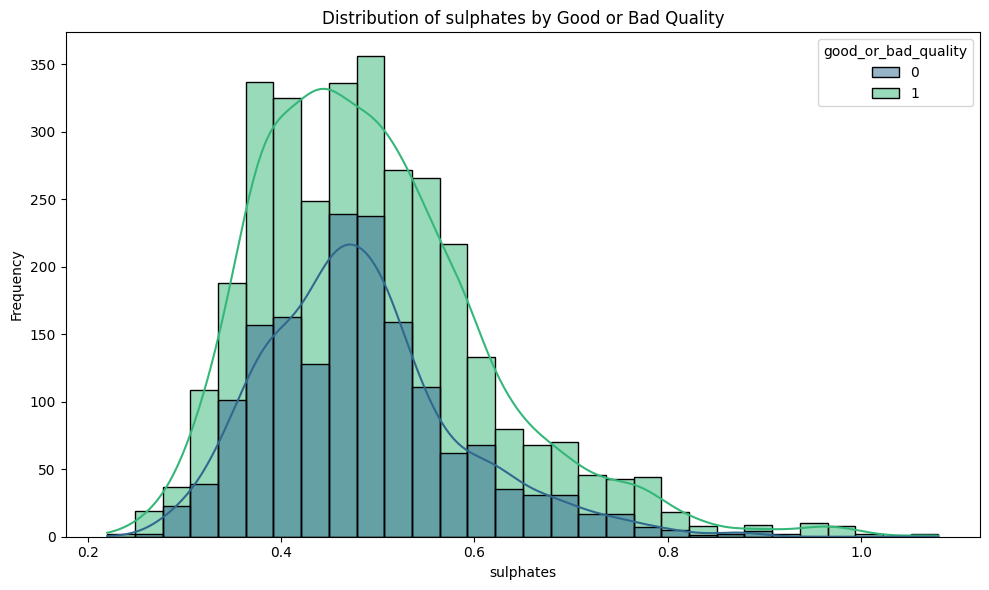

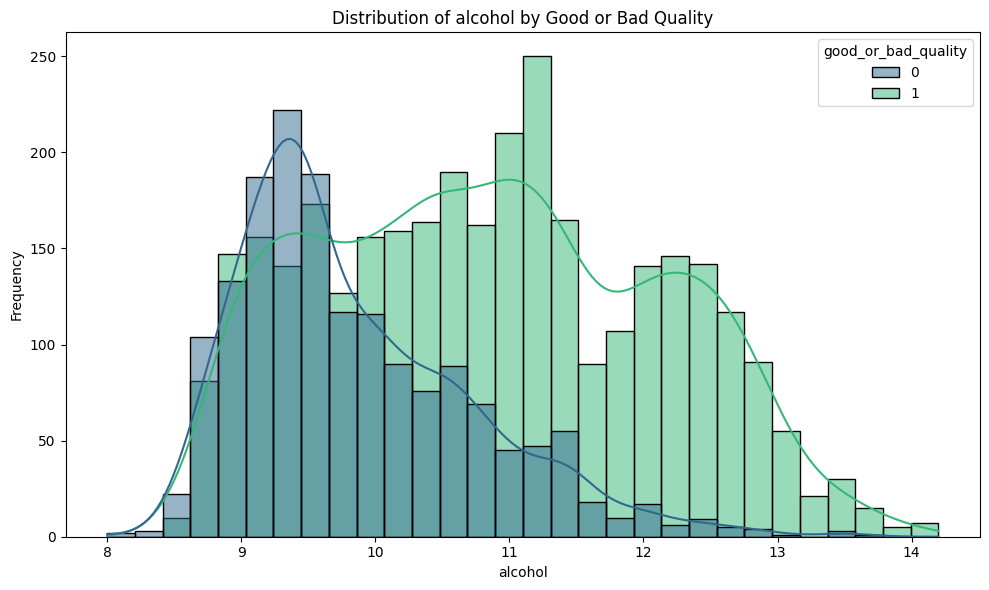

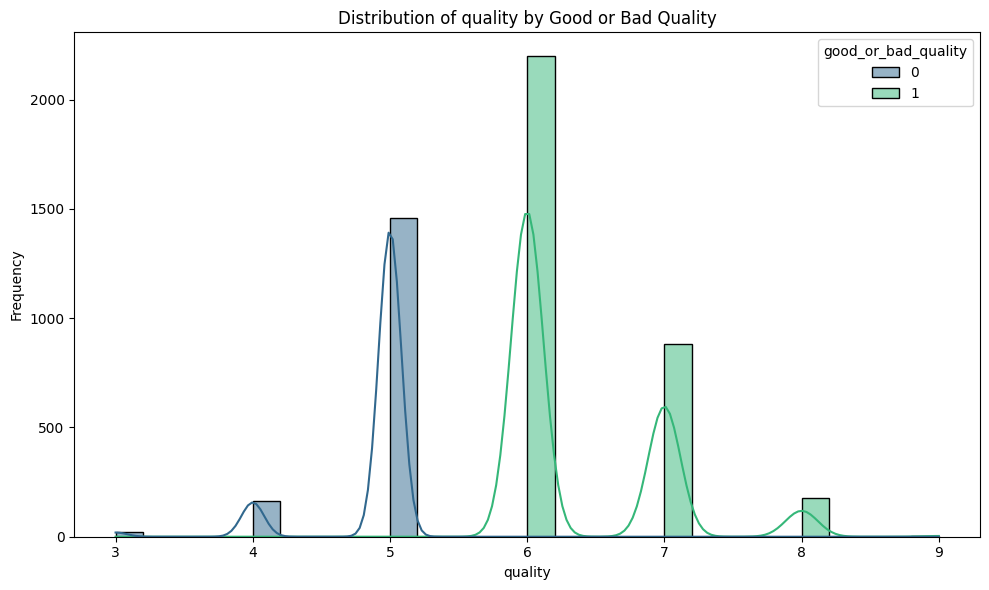

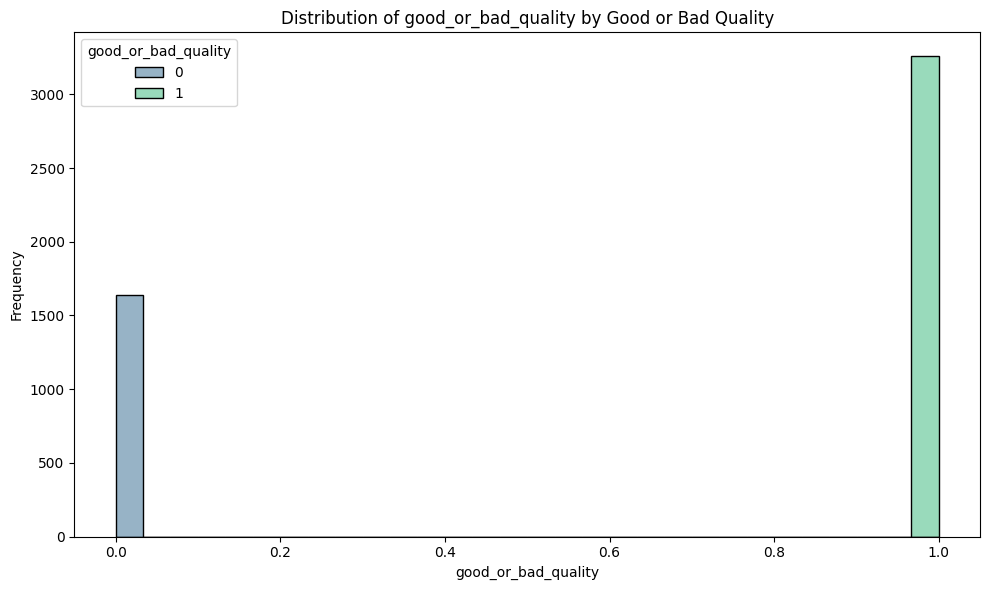

In [9]:
# numerical_columns = wine.select_dtypes(include='number').columns

for col in wine.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=wine, x=col, hue="good_or_bad_quality", bins=30, kde=True, palette="viridis")
    plt.title(f'Distribution of {col} by Good or Bad Quality')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

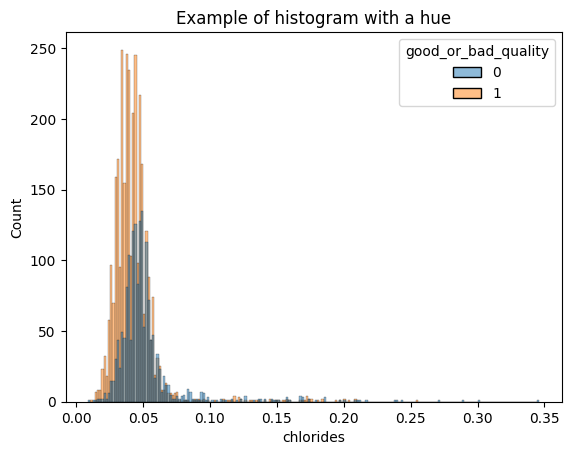

In [10]:
sns.histplot(x='chlorides', data=wine, hue='good_or_bad_quality')
plt.title("Example of histogram with a hue")
plt.show()

In [11]:
for col in wine.select_dtypes(include='float').columns:
    sns.boxplot(y=wine[col], x=wine)
    plt.title(f"Boxplot of {col}")
    plt.show()


ValueError: Data must be 1-dimensional, got ndarray of shape (4898, 13) instead

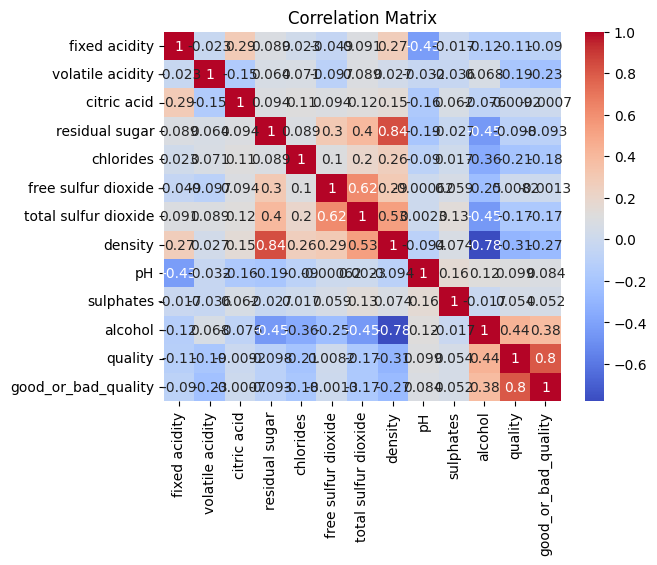

In [12]:
corr_matrix = wine.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


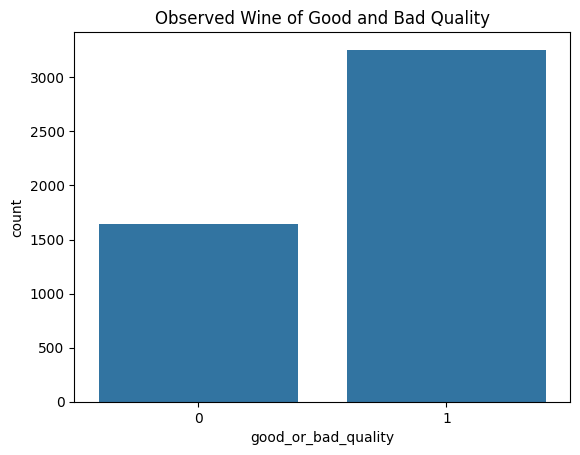

In [13]:
fig1 = sns.countplot(data=wine, x='good_or_bad_quality')
fig1.set_title('Observed Wine of Good and Bad Quality')
plt.show()

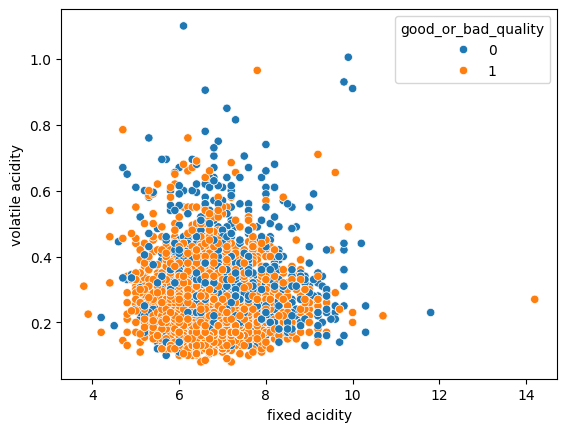

In [14]:
fig2 = sns.scatterplot(data=wine, x="fixed acidity", y="volatile acidity", hue="good_or_bad_quality")

## Splitting Up the Dataset

In [41]:
from sklearn.model_selection import train_test_split

X = wine.drop(columns=['quality', 'good_or_bad_quality'])
y = wine['good_or_bad_quality']

# train and validation split 80: 20
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=73)

# train and test split 70: 10
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.125, random_state=73)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1489,7.9,0.160,0.74,17.85,0.037,52.0,187.0,0.99980,2.99,0.41,9.3
3903,5.8,0.270,0.26,3.50,0.071,26.0,69.0,0.98994,3.10,0.38,11.5
3780,6.7,0.420,0.39,12.10,0.040,61.0,248.0,0.99794,3.31,0.58,9.7
3334,6.6,0.425,0.25,2.35,0.034,23.0,87.0,0.99082,3.05,0.41,11.4
764,6.3,0.300,0.28,5.00,0.042,36.0,168.0,0.99505,3.22,0.69,9.5
...,...,...,...,...,...,...,...,...,...,...,...
2210,7.4,0.240,0.26,1.60,0.058,53.0,150.0,0.99360,3.18,0.50,9.9
166,8.4,0.270,0.46,8.70,0.048,39.0,197.0,0.99740,3.14,0.59,9.6
1119,6.4,0.500,0.16,12.90,0.042,26.0,138.0,0.99740,3.28,0.33,9.0
1897,7.5,0.290,0.67,8.10,0.037,53.0,166.0,0.99660,2.90,0.41,8.9


## Setting Up the K-Nearest Neighbors Classifier

### Testing Different "k" Values

In [36]:
from sklearn.neighbors import KNeighborsClassifier

random.seed = 73
# classifier for 3 nearest neighbors
knn_three = KNeighborsClassifier(n_neighbors=3)

# classifier for 7 nearest neighbors
knn_seven = KNeighborsClassifier(n_neighbors=7)

# classifier for 15 nearest neighbors
knn_fifteen = KNeighborsClassifier(n_neighbors=15)

# fitting the classifiers
knn_three_fit = knn_three.fit(X_train, y_train)
knn_seven_fit = knn_seven.fit(X_train, y_train)
knn_fifteen_fit = knn_fifteen.fit(X_train, y_train)

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# predicting validation data for all classifiers
knn_three_val_pred = knn_three.predict(X_val)
knn_seven_val_pred = knn_seven.predict(X_val)
knn_fifteen_val_pred = knn_fifteen.predict(X_val)

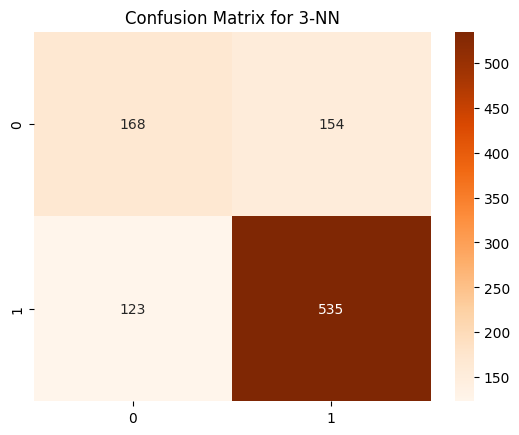

In [38]:
# TN, FP
# FN, TP
cm1 = confusion_matrix(y_val, knn_three_val_pred)
fig1b = sns.heatmap(cm1, annot=True, fmt=".0f", cmap="Oranges", cbar=True)

fig1b.set_title("Confusion Matrix for 3-NN")
plt.show(fig1b)

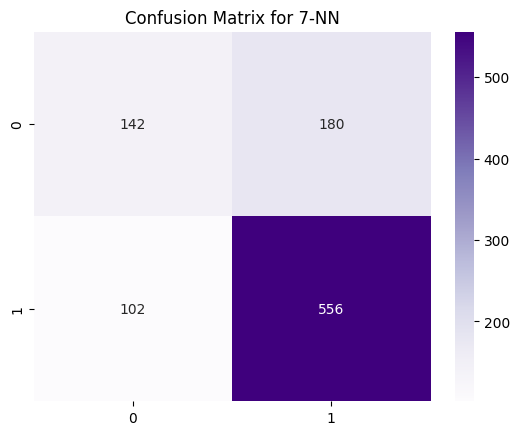

In [19]:
cm2 = confusion_matrix(y_val, knn_seven_val_pred)
fig2b = sns.heatmap(cm2, annot=True, fmt=".0f", cmap="Purples", cbar=True)

fig2b.set_title("Confusion Matrix for 7-NN")
plt.show(fig2b)

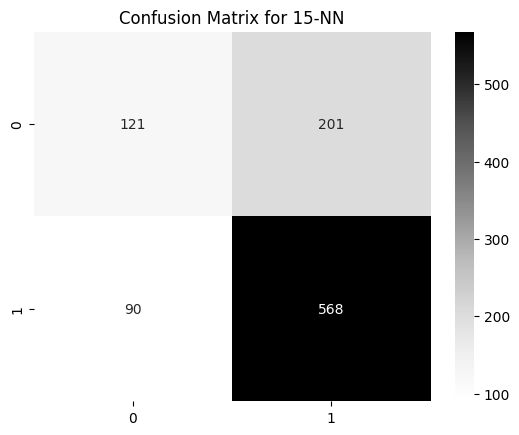

In [20]:
cm3 = confusion_matrix(y_val, knn_fifteen_val_pred)
fig3b = sns.heatmap(cm3, annot=True, fmt=".0f", cmap="Grays", cbar=True)

fig3b.set_title("Confusion Matrix for 15-NN")
plt.show(fig3b)

The larger the value of k is, the more it seems the k-NN Classifier guesses positive. While this does mean it predicts more true positives, it guesses more false positives as well.

### Finding the Optimal "k" Value

In [25]:
# this function should be a seperate python file later

# import find_optimal_k.py
def find_optimal_k(start, stop, X_train, y_train, X_test, y_test):
    optimal = 0
    optimal_fpr = 1

    for k in range(start,stop, 2):
        knn_search = KNeighborsClassifier(n_neighbors=k)
        knn_search_fit = knn_search.fit(X_train, y_train)
        y_pred = knn_search_fit.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        fpr = 1
        TN = cm[0, 0]
        FP = cm[0, 1]
      # Calculate specificity
        if TN + FP > 0:
          fpr = FP / (TN + FP)
        if fpr < optimal_fpr:
            optimal = k
            optimal_fpr = fpr

    return optimal

k = find_optimal_k(3, 30, X_train, y_train, X_val, y_val)
print(f"Optimal k Value: {k}")
knn_optimal = KNeighborsClassifier(n_neighbors=k)

knn_optimal_fit = knn_optimal.fit(X_train, y_train)

knn_optimal_val_pred = knn_optimal.predict(X_val)

Optimal k Value: 3


According to the find_optimal_k function we created, 5 is the best k-value for this dataset.

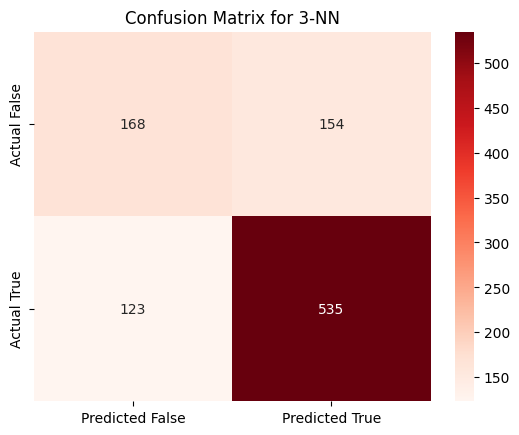

In [27]:
cm4 = confusion_matrix(y_val, knn_optimal_val_pred)
fig4b = sns.heatmap(cm4, annot=True, fmt=".0f", cmap="Reds", cbar=True,
                    xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])

fig4b.set_title("Confusion Matrix for 3-NN")
plt.show(fig4b)

In [28]:

knn_accur = accuracy_score(y_val, knn_optimal_val_pred)
knn_prec = precision_score(y_val, knn_optimal_val_pred)
knn_recall = recall_score(y_val, knn_optimal_val_pred)
knn_f1_score = f1_score(y_val, knn_optimal_val_pred)
knn_spec = 1 - recall_score(y_val, knn_optimal_val_pred)

print(f"Accuracy Score: {knn_accur}")
print(f"Precision Score: {knn_prec}")
print(f"Recall Score: {knn_recall}")
print(f"F1 Score: {knn_f1_score}")
print(f"Specificity Score: {knn_spec}")

Accuracy Score: 0.7173469387755103
Precision Score: 0.7764876632801161
Recall Score: 0.8130699088145896
F1 Score: 0.7943578322197475
Specificity Score: 0.18693009118541037


### Naïve Bayes

In [29]:
# Train Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_val_pred = nb.predict(X_val)
nb_val_proba = nb.predict_proba(X_val)[:, 1]

In [30]:
# Train Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=73)
dt.fit(X_train, y_train)
dt_val_pred = dt.predict(X_val)
dt_val_proba = dt.predict_proba(X_val)[:, 1]

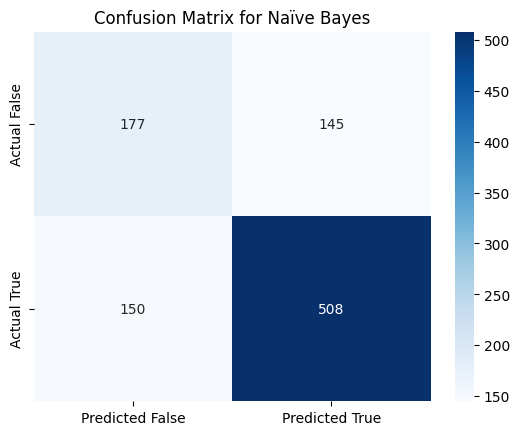

In [31]:
# Confusion Matrices
nb_cm = confusion_matrix(y_val, nb_val_pred)
fig_nb = sns.heatmap(nb_cm, annot=True, fmt=".0f", cmap="Blues", cbar=True,
                     xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
fig_nb.set_title("Confusion Matrix for Naïve Bayes")
plt.show(fig_nb)

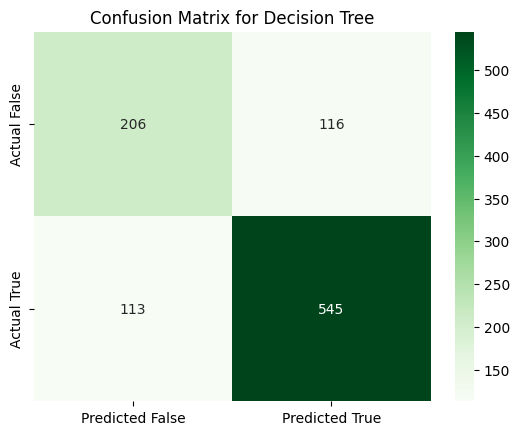

In [32]:
dt_cm = confusion_matrix(y_val, dt_val_pred)
fig_dt = sns.heatmap(dt_cm, annot=True, fmt=".0f", cmap="Greens", cbar=True,
                     xticklabels=["Predicted False", "Predicted True"], yticklabels=["Actual False", "Actual True"])
fig_dt.set_title("Confusion Matrix for Decision Tree")
plt.show(fig_dt)

In [44]:
# Metrics for all models
def metric_calculation(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    specificity = 0
    TN = cm[0, 0]
    FP = cm[0, 1]
    # Calculate specificity
    if TN + FP > 0:
        specificity = TN / (TN + FP)
    return accuracy, precision, recall, specificity, f1


In [43]:
knn_metrics = metric_calculation(y_val, knn_optimal_val_pred)
nb_metrics = metric_calculation(y_val, nb_val_pred)
dt_metrics = metric_calculation(y_val, dt_val_pred)

print("k-NN Metrics:", knn_metrics)
print("Naïve Bayes Metrics:", nb_metrics)
print("Decision Tree Metrics:", dt_metrics)

k-NN Metrics: (0.7173469387755103, 0.7764876632801161, 0.8130699088145896, 0.5217391304347826, 0.7943578322197475)
Naïve Bayes Metrics: (0.6989795918367347, 0.777947932618683, 0.7720364741641338, 0.5496894409937888, 0.7749809305873379)
Decision Tree Metrics: (0.7663265306122449, 0.8245083207261724, 0.8282674772036475, 0.639751552795031, 0.8263836239575436)


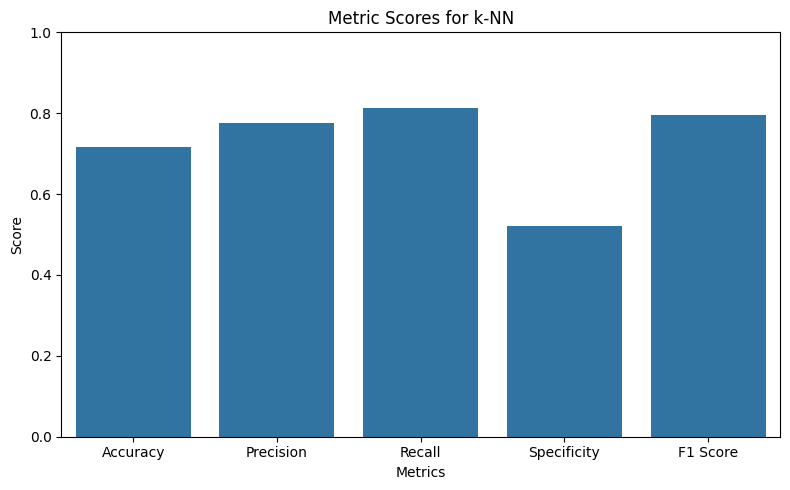

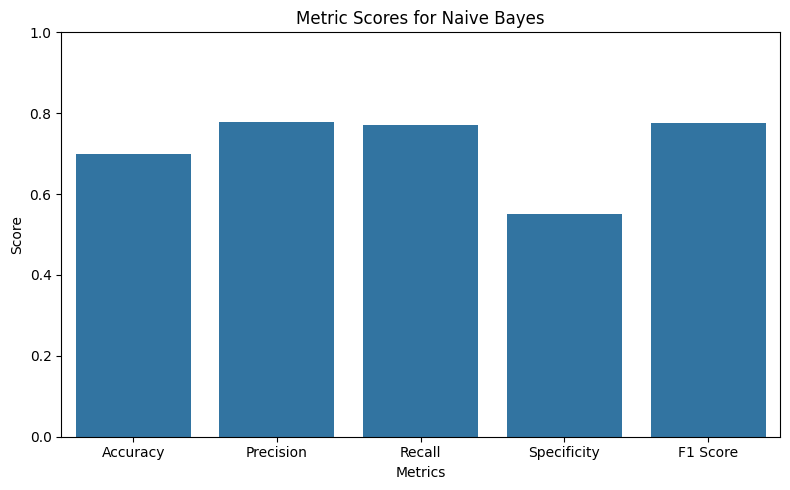

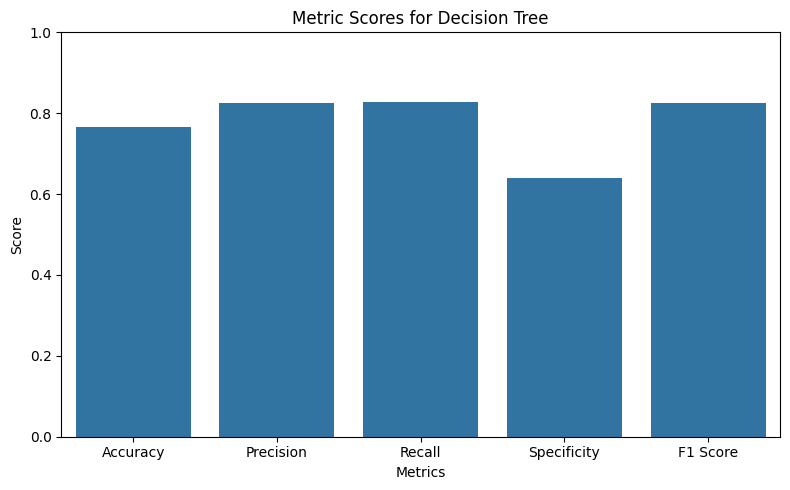

In [45]:
# Combine the metrics into a DataFrame
metric_names = ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]

data = {
    "Metric": metric_names,
    "k-NN": list(knn_metrics),
    "Naive Bayes": list(nb_metrics),
    "Decision Tree": list(dt_metrics)
}

df = pd.DataFrame(data)

# Create separate plots for each model
models = ["k-NN", "Naive Bayes", "Decision Tree"]

for model in models:
    plt.figure(figsize=(8, 5))
    sns.barplot(x="Metric", y=model, data=df)
    plt.title(f"Metric Scores for {model}")
    plt.xlabel("Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)  # Metrics typically range from 0 to 1
    plt.tight_layout()
    plt.show()


In [ ]:

metric_names = ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]


# This organizes the metrics, their scores, and the model names in a format suitable for creating a grouped bar plot
data = {
    "Metric": metric_names * 3,  # Repeat metric names for each model
    "Score": list(knn_metrics) + list(nb_metrics) + list(dt_metrics),  # Combine all metrics
    "Model": ["k-NN"] * len(metric_names) + ["Naive Bayes"] * len(metric_names) + ["Decision Tree"] * len(metric_names)  # Model labels
}

print(data["Metric"])
print(data["Score"])
print(data["Model"])


df = pd.DataFrame(data)

# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", hue="Model", data=df, palette="viridis")

# Customize the plot
plt.title("Comparison of Metrics Across Models")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)  # Assuming metrics range between 0 and 1
plt.legend(title="Model")
plt.tight_layout()

# Show the plot
# plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
# ROC Curves
plt.figure(figsize=(8, 6))

def plot_roc_curve(y_true, y_proba, label):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    auc = roc_auc_score(y_true, y_proba)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {auc:.2f})')

plot_roc_curve(y_val, knn_optimal.predict_proba(X_val)[:, 1], 'k-NN')
plot_roc_curve(y_val, nb_val_proba, 'Naive Bayes')
plot_roc_curve(y_val, dt_val_proba, 'Decision Tree')


# Customize plot
plt.title("ROC Curves for Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(title="Model", loc="lower right", fontsize=15, title_fontsize= 'xx-large')
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
best_model = dt

# Evaluate Decision Tree on the test set
best_model_test_pred = best_model.predict(X_test)
best_model_test_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics using the metric_calculation function
dt_test_metrics = metric_calculation(y_test, best_model_test_pred)

test_accuracy, test_precision, test_recall, test_specificity, test_f1 = dt_test_metrics

print(f"Decision Tree Test Performance:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"Specificity: {test_specificity:.2f}")
print(f"F1 Score: {test_f1:.2f}")


In [46]:
# This organizes the metrics, their scores, and the model names in a format suitable for creating a grouped bar plot

metric_names = ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"]

data = {
    "Metric": metric_names,
    "Score": list(dt_test_metrics) ,
    "Model": ["Decision Tree"] * len(metric_names)
}

df = pd.DataFrame(data)

# Plot the metrics using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Metric", y="Score", data=df)

# Customize the plot
plt.title("Comparison of Metrics for Decision Tree")
plt.xlabel("Metric")
plt.ylabel("Score")
plt.ylim(0, 1)  # Assuming metrics range between 0 and 1
# plt.legend(title="Model")
plt.tight_layout()

# Show the plot
plt.show()

NameError: name 'dt_test_metrics' is not defined

<ipython-input-47-545e16127b5c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette="viridis")


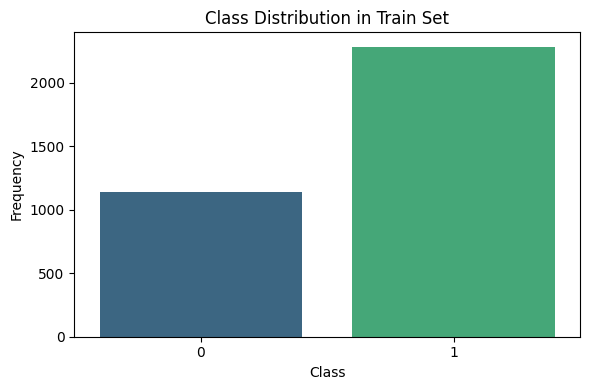

<ipython-input-47-545e16127b5c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette="viridis")


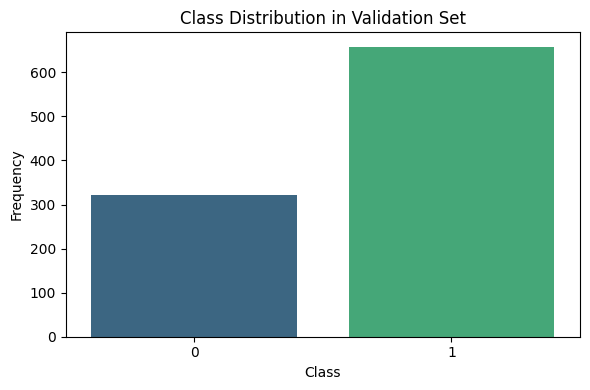

<ipython-input-47-545e16127b5c>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data, palette="viridis")


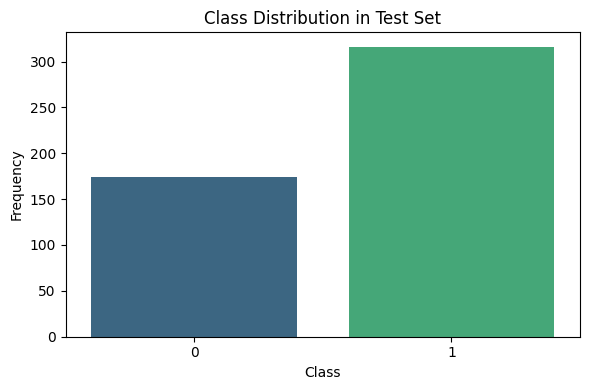

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine all datasets for a consolidated view
datasets = {
    "Train": pd.Series(y_train, name="Class"),
    "Validation": pd.Series(y_val, name="Class"),
    "Test": pd.Series(y_test, name="Class")
}

# Plot distribution for each dataset
for dataset_name, data in datasets.items():
    plt.figure(figsize=(6, 4))
    sns.countplot(x=data, palette="viridis")
    plt.title(f"Class Distribution in {dataset_name} Set")
    plt.xlabel("Class")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [ ]:
# Calculate proportions for each dataset
for dataset_name, data in datasets.items():
    proportions = data.value_counts(normalize=True)
    plt.figure(figsize=(6, 6))
    plt.pie(proportions, labels=proportions.index, autopct="%1.1f%%", startangle=90, colors=["#66b3ff", "#99ff99"])
    plt.title(f"Class Distribution in {dataset_name} Set")
    plt.axis("equal")  # Equal aspect ratio ensures the pie chart is circular
    plt.show()


In [ ]:
# Create a DataFrame to consolidate distributions
class_counts = pd.DataFrame({
    "Train": y_train.value_counts(normalize=True),
    "Validation": y_val.value_counts(normalize=True),
    "Test": y_test.value_counts(normalize=True)
}).T

# Bar plot for class proportions across datasets
class_counts.plot(kind="bar", figsize=(8, 5), colormap="viridis")
plt.title("Class Proportions Across Train, Validation, and Test Sets")
plt.xlabel("Dataset")
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(title="Class")
plt.tight_layout()
plt.show()
